In [73]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier


In [74]:
train = pd.read_csv('train_promotion_eligibility.csv')
test = pd.read_csv('test_promotion_eligibility.csv')


In [76]:
test_ids = test['employee_id'].copy()
train['is_train'] = 1
test['is_train'] = 0
test['is_promoted'] = np.nan  # Dummy column to match train

combined = pd.concat([train, test], axis=0)


In [79]:
combined['education'] = combined['education'].fillna(combined['education'].mode()[0])
combined['previous_year_rating'] = combined['previous_year_rating'].fillna(combined['previous_year_rating'].median())


In [82]:
le = LabelEncoder()
for col in ['department', 'region', 'education', 'gender', 'recruitment_channel']:
    combined[col] = le.fit_transform(combined[col])


In [84]:
train_data = combined[combined['is_train'] == 1].drop(['is_train', 'employee_id'], axis=1)
test_data = combined[combined['is_train'] == 0].drop(['is_train', 'is_promoted', 'employee_id'], axis=1)

X = train_data.drop('is_promoted', axis=1)
y = train_data['is_promoted']


In [86]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [89]:
model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42
)

model.fit(X_resampled, y_resampled)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [91]:
y_train_pred = model.predict(X_resampled)
print("Train F1 Score:", f1_score(y_resampled, y_train_pred))


Train F1 Score: 0.9353363814500326


In [93]:
y_pred_test = model.predict(test_data)


In [96]:
submission = pd.DataFrame({
    'employee_id': test_ids,
    'is_promoted': y_pred_test
})

submission.to_csv('submission0001.csv', index=False)
print("✅ Submission file saved as 'submission0001.csv'")


✅ Submission file saved as 'submission0001.csv'


<Figure size 1000x800 with 0 Axes>

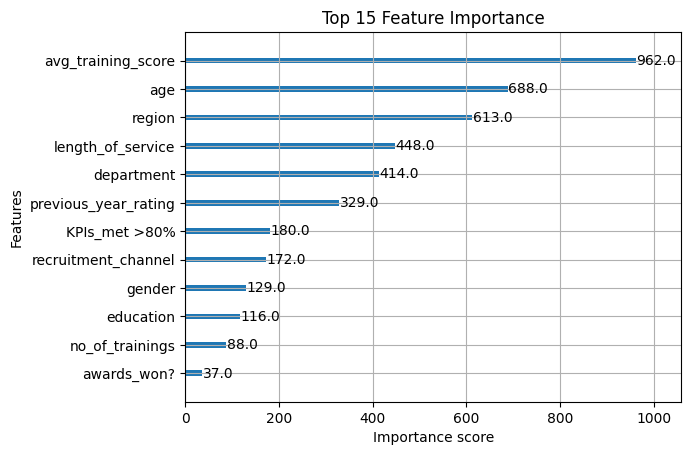

In [98]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Plot feature importance from the trained XGBoost model
plt.figure(figsize=(10, 8))
plot_importance(model, max_num_features=15, importance_type='weight')
plt.title('Top 15 Feature Importance')
plt.show()


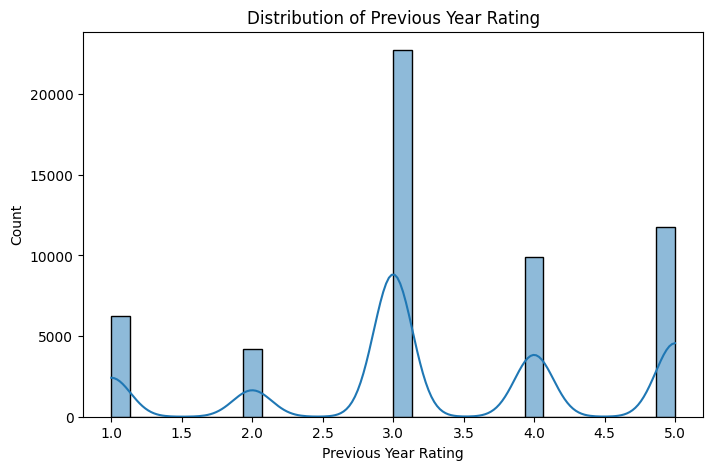

In [100]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(combined['previous_year_rating'].dropna(), bins=30, kde=True)
plt.title('Distribution of Previous Year Rating')
plt.xlabel('Previous Year Rating')
plt.ylabel('Count')
plt.show()


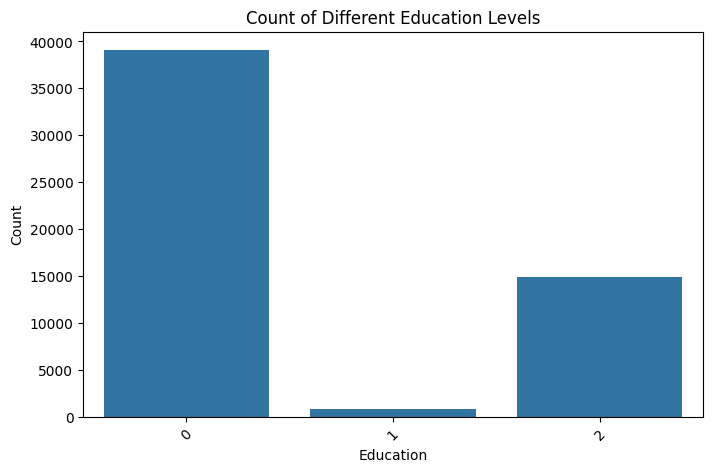

In [102]:
plt.figure(figsize=(8, 5))
sns.countplot(x='education', data=combined)
plt.title('Count of Different Education Levels')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


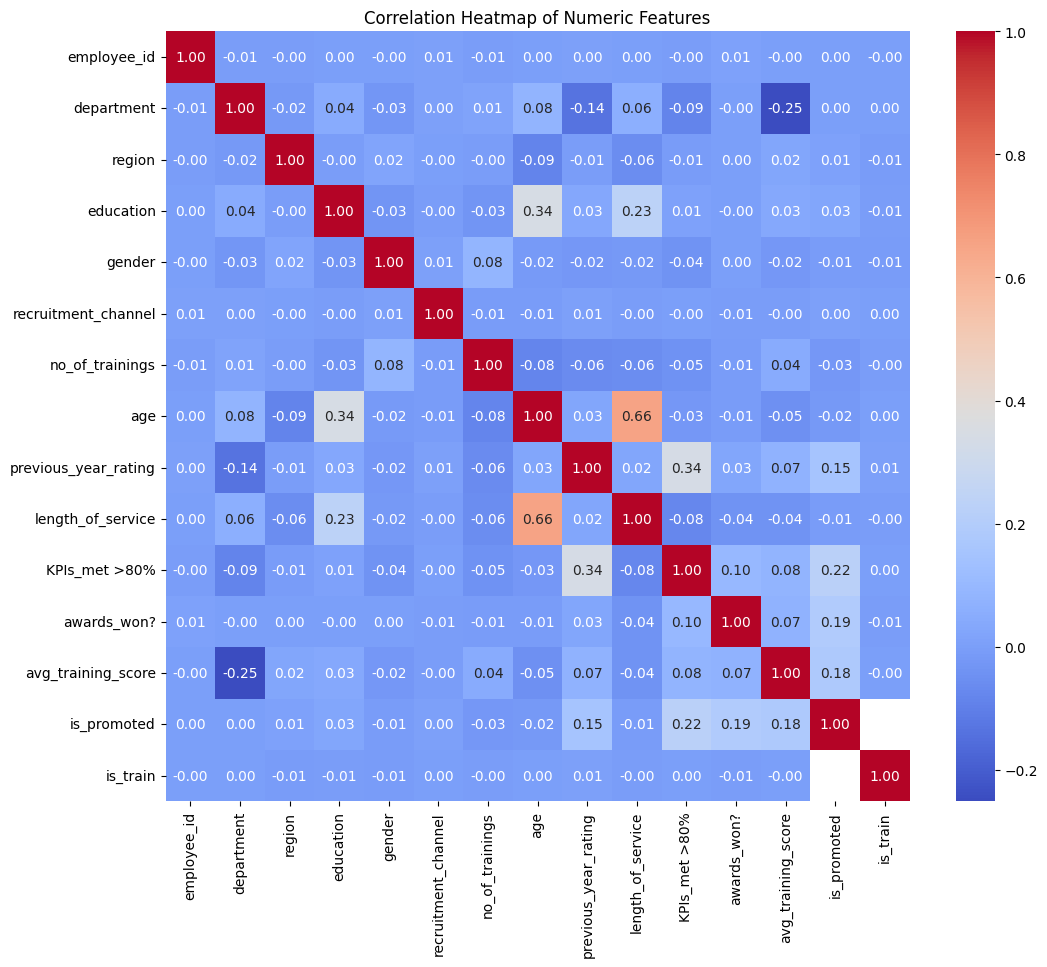

In [104]:
plt.figure(figsize=(12, 10))
sns.heatmap(combined.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


In [3]:
!pip install ipywidgets





[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install jupyter_contrib_nbextensions
!jupyter contrib nbextension install --user
!jupyter nbextension enable --py widgetsnbextension --user



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Traceback (most recent call last):
  File "C:\my_python_installed001011\Lib\site-packages\jupyter_contrib_core\notebook_compat\nbextensions.py", line 6, in <module>
    from notebook.extensions import BaseExtensionApp
ModuleNotFoundError: No module named 'notebook.extensions'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\my_python_installed001011\Lib\site-packages\jupyter_contrib_core\notebook_compat\nbextensions.py", line 10, in <module>
    from notebook.nbextensions import BaseNBExtensionApp
ModuleNotFoundError: No module named 'notebook.nbextensions'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\my_python_installed00

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from ipywidgets import interact, Dropdown

# Assuming combined is your dataframe and 'is_promoted' is the target

def plot_feature(feature):
    plt.figure(figsize=(14,5))

    # Plot 1: Count plot of the feature
    plt.subplot(1, 2, 1)
    sns.countplot(data=combined, x=feature, order=combined[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)

    # Plot 2: Promotion rate by feature category
    plt.subplot(1, 2, 2)
    promo_rate = combined.groupby(feature)['is_promoted'].mean().sort_values(ascending=False)
    promo_rate.plot(kind='bar')
    plt.title(f'Promotion Rate by {feature}')
    plt.ylabel('Promotion Rate')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

# List of columns to explore (exclude employee_id, etc.)
features = [col for col in combined.columns if col not in ['employee_id', 'is_promoted']]

interact(plot_feature, feature=Dropdown(options=features, description='Feature:'))


NameError: name 'combined' is not defined

In [118]:
import notebook
print(notebook.__version__)


7.3.2
